In [1]:
from pathlib import Path
from typing import List
import gzip
import numpy as np
import pandas as pd

import torch.utils.data as Data 
import torch
import matplotlib.pyplot as plt
from torch import nn ,optim
from nilearn.image import smooth_img

In [9]:
data_participants_dir='E:/Data/participants1.tsv'#获取全部实验者的数据
data_participants_tsv=pd.read_csv(data_participants_dir,sep='\t')
data_NoNaN=data_participants_tsv.dropna(axis=0,how='any')#去除NAN无效数据
data_raven=data_NoNaN.raven_score
data_raven

0      29.0
1      27.0
2      22.0
3      21.0
4      28.0
       ... 
211    19.0
212    18.0
213    19.0
214    24.0
215    21.0
Name: raven_score, Length: 208, dtype: float64

In [10]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [19]:
def create_age_array(count,data):
    for i in data:
        if i<=16:
            count[0]+=1
        elif i<=18:
            count[1]+=1
        elif i<=20:
            count[2]+=1
        elif i<=22:
            count[3]+=1
        elif i<=24:
            count[4]+=1
        elif i<=26:
            count[5]+=1
        elif i<=28:
            count[6]+=1
        elif i<=30:
            count[7]+=1
        elif i<=32:
            count[8]+=1
        else :
            count[9]+=1
        
    return count

<BarContainer object of 10 artists>

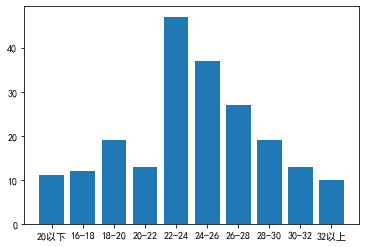

In [29]:
count=np.array([0,0,0,0,0,0,0,0,0,0])
count=create_age_array(count,data_raven)
name_list = ['20以下','16-18','18-20','20-22','22-24','24-26','26-28','28-30','30-32','32以上']  
plt.bar(range(len(name_list)), count,tick_label=name_list) 

In [24]:
data2_participants_dir='E:/Data/participants2.tsv'#获取全部实验者的数据
data2_participants_tsv=pd.read_csv(data2_participants_dir,sep='\t')
data2_NoNaN=data2_participants_tsv.dropna(axis=0,how='any')#去除NAN无效数据
data2_raven=data2_NoNaN.raven_score
data2_raven

0      33.0
1      19.0
2      29.0
3      24.0
4      24.0
       ... 
221    30.0
222    26.0
223    34.0
224    27.0
225    19.0
Name: raven_score, Length: 224, dtype: float64

<BarContainer object of 10 artists>

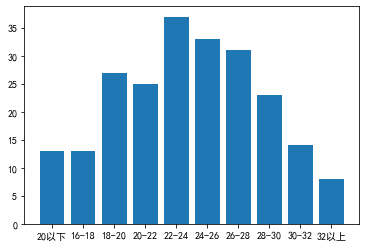

In [28]:
count2=np.array([0,0,0,0,0,0,0,0,0,0])
count2=create_age_array(count2,data2_raven)
name_list = ['20以下','16-18','18-20','20-22','22-24','24-26','26-28','28-30','30-32','32以上'] 
plt.bar(range(len(name_list)), count2,tick_label=name_list) 

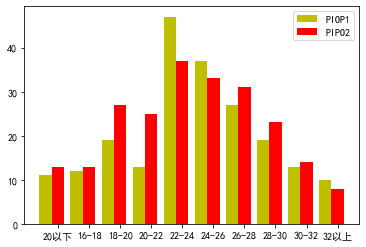

In [30]:
width=0.4
x =list(range(len(name_list)))  
plt.bar(x, count, width=width, label='PIOP1',fc = 'y')
for i in range(len(x)):  
    x[i] = x[i] + width  
plt.bar(x, count2, width=width, label='PIPO2',tick_label = name_list,fc = 'r')
plt.legend()  


In [55]:
import joypy
target=data2_NoNaN.columns[7:]
target

Index(['NEO_N', 'NEO_E', 'NEO_O', 'NEO_A', 'NEO_C'], dtype='object')

<Figure size 80x50 with 0 Axes>

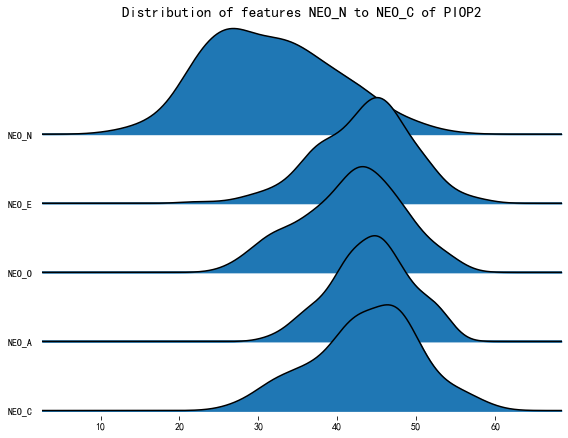

In [57]:
plt.figure(figsize=(8,5), dpi= 10)
fig, axes = joypy.joyplot(data2_NoNaN, column=list(target), ylim='own', figsize=(8,6))

# Decoration
plt.title('Distribution of features NEO_N to NEO_C of PIOP2', fontsize=15)
plt.show()